# MOwNiT - laboratorium 3

## Autor: Tomasz Boroń

## Temat: Funkcje sklejane

## Importy

In [18]:
from sys import version
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from math import sin
from math import cos
from math import sqrt
from matplotlib.animation import FuncAnimation
from IPython.display import display, HTML

## Funkcja początkowa:

$ f(x)=-2x*sin(3(x-1))$

In [19]:
def f(x):
    return -2*x*sin(3*(x-1))

Przedział:

$ [-2\Pi+1, \Pi+1] $

In [20]:
a = -2*pi+1
b = pi+1

Wykres:

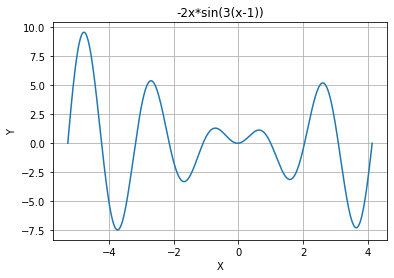

In [21]:
xs = [a+x*(b-a)/999 for x in range(1000)]
func = [f(x) for x in xs]
text = "-2x*sin(3(x-1))"
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.grid()
plt.show()

## Wersja Pythona

In [22]:
print(version)

3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]


## Funkcje

#### Węzły równoodległe

In [23]:
def equal_dist_nodes(a,b,n):
    return [a+x*(b-a)/n for x in range(n+1)]

#### Ilorazy różnicowe

In [24]:
def delta_d(nodes, nodes_vals, i, d):
    if d == 1:
        return (nodes_vals[i]-nodes_vals[i-1])/(nodes[i]-nodes[i-1])
    return (delta_d(nodes,nodes_vals,i+1,d-1)-delta_d(nodes,nodes_vals,i,d-1))/(nodes[i+d-1]-nodes[i-1])

#### Spline 3 stopnia

In [25]:
def cubic_spline(nodes, nodes_vals, xs, boundary):
    n = len(nodes)
    h = [nodes[i+1]-nodes[i] for i in range(0, n-1)]
    b_vec = [(nodes_vals[i+2]-nodes_vals[i+1])/(nodes[i+2]-nodes[i+1])-(nodes_vals[i+1]-nodes_vals[i])/(nodes[i+1]-nodes[i]) 
             for i in range(0, n-2)]
    A = np.zeros((n,n))
    for row in range(1, n-1):
        for col in range(0, n):
            if row == col:
                A[row,col] = 2*(h[row-1]+h[row])
            elif row == col-1:
                A[row,col] = h[row-1]
            elif row == col+1:
                A[row,col] = h[row]
    if boundary == "4_points":
        A[0,0] = -h[0]
        A[0,1] = h[0]
        A[n-1,n-2] = h[n-2]
        A[n-1,n-1] = -h[n-2]
        b_vec = [h[0]**2*delta_d(nodes, nodes_vals, 1, 3)] + b_vec + [-h[n-2]**2*delta_d(nodes, nodes_vals, n-3, 3)]
        B = np.array(b_vec)
        sigmas = np.linalg.solve(A,B)
    elif boundary == "natural":
        A = np.delete(A, n-1, 0)
        A = np.delete(A, n-1, 1)
        A = np.delete(A, 0, 0)
        A = np.delete(A, 0, 1)
        B = np.array(b_vec)
        sigmas = np.linalg.solve(A,B)
        sigmas = [0] + list(sigmas) + [0]
    else:
        return None
    #print(A)
    #print(B)
    #print(sigmas)
    a = []
    b = []
    c = []
    d = []
    for i in range(n-1):
        a.append(nodes_vals[i])
        b.append((nodes_vals[i+1]-nodes_vals[i])/h[i]-h[i]*(sigmas[i+1]+2*sigmas[i]))
        c.append(3*sigmas[i])
        d.append((sigmas[i+1]-sigmas[i])/h[i])
    #print(a)
    #print(b)
    #print(c)
    #print(d)
    i = 0
    ys = []
    for x in xs:
        if x>nodes[i+1]:
            i+=1
        ys.append(a[i]+b[i]*(x-nodes[i])+c[i]*(x-nodes[i])**2+d[i]*(x-nodes[i])**3)
    return ys

#### Spline 2 stopnia

In [26]:
def quadratic_spline(nodes, nodes_vals, xs, boundary):
    n = len(nodes)
    h = [nodes[i+1]-nodes[i] for i in range(0, n-1)]
    z = []
    if boundary == "1st_linear":
        z.append((nodes_vals[1]-nodes_vals[0])/h[0])
    elif boundary == "z0=0":
        z.append(0)
    else:
        return None
    for i in range(1,n):
        z.append(-z[i-1]+2*((nodes_vals[i]-nodes_vals[i-1])/h[i-1]))
    a = []
    b = []
    c = []
    for i in range(n-1):
        a.append((z[i+1]-z[i])/(2*h[i]))
        b.append(z[i])
        c.append(nodes_vals[i])
    i = 0
    ys = []
    for x in xs:
        if x>nodes[i+1]:
            i+=1
        ys.append(c[i]+b[i]*(x-nodes[i])+a[i]*(x-nodes[i])**2)
    return ys

## Program

#### Konfiguracja

In [27]:
n = 7 # liczba przedziałów; węzłów n+1
xs = [a+x*(b-a)/999 for x in range(1000)]
eq_nodes = equal_dist_nodes(a,b,n)
eq_nodes_func = [f(x) for x in eq_nodes]

#### Test

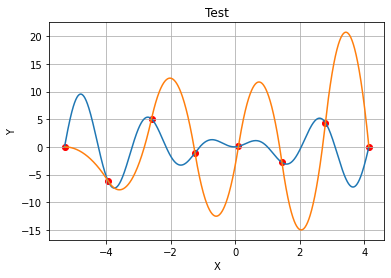

In [28]:
# ys = cubic_spline(eq_nodes, eq_nodes_func, xs, "4_points")
ys = quadratic_spline(eq_nodes, eq_nodes_func, xs, "z0=0")
func = [f(x) for x in xs]
text = "Test"
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,ys)
plt.scatter(eq_nodes,eq_nodes_func, color = 'red')
plt.grid()
plt.show()

## Animacje

In [29]:
%matplotlib notebook
xs = [a+x*(b-a)/999 for x in range(1000)]
func = [f(x) for x in xs]

<IPython.core.display.Javascript object>


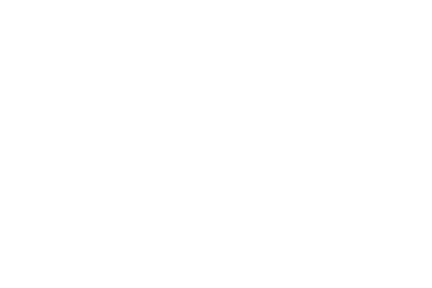

<IPython.core.display.Javascript object>


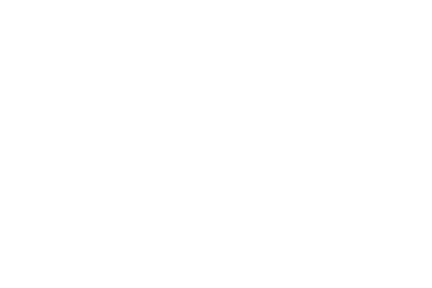

Traceback (most recent call last):
  File "C:\Users\Tomek\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Users\Tomek\anaconda3\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [30]:
fig, ax = plt.subplots()
line, = ax.plot(xs,func)

def update(n):
    nodes_eq = equal_dist_nodes(a,b,n)
    nodes_func_eq = [f(x) for x in nodes_eq]
    ax.clear()
    ax.plot(xs,func)
    ax.scatter(nodes_eq,nodes_func_eq,color='red')
    ys = cubic_spline(nodes_eq, nodes_func_eq, xs, "4_points")
    line, = ax.plot(xs, ys)
    ax.grid()
    ax.set_title("3 deg. spline, boundary: 4 points, {0} equal distance nodes".format(n+1))
    return line,ax

anim = FuncAnimation(fig, update, frames=np.arange(3,30),interval=1500)
HTML(anim.to_html5_video())

<IPython.core.display.Javascript object>


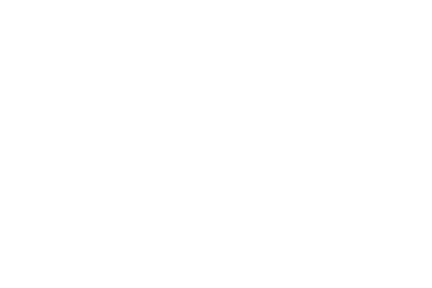

<IPython.core.display.Javascript object>


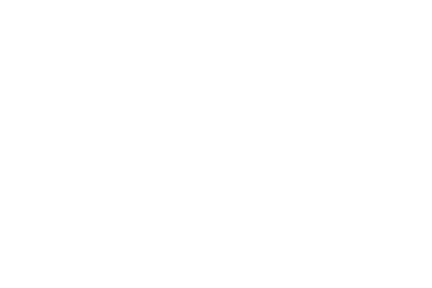

Traceback (most recent call last):
  File "C:\Users\Tomek\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Users\Tomek\anaconda3\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [32]:
fig, ax = plt.subplots()
line, = ax.plot(xs,func)

def update(n):
    nodes_eq = equal_dist_nodes(a,b,n)
    nodes_func_eq = [f(x) for x in nodes_eq]
    ax.clear()
    ax.plot(xs,func)
    ax.scatter(nodes_eq,nodes_func_eq,color='red')
    ys = cubic_spline(nodes_eq, nodes_func_eq, xs, "natural")
    line, = ax.plot(xs, ys)
    ax.grid()
    ax.set_title("3 deg. spline, boundary: natural cubic spline, {0} equal distance nodes".format(n+1))
    return line,ax

anim = FuncAnimation(fig, update, frames=np.arange(3,30),interval=1500)
HTML(anim.to_html5_video())

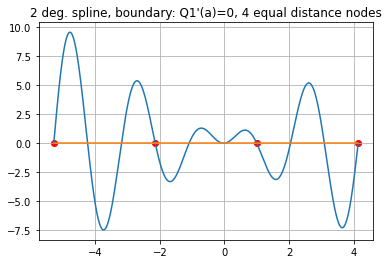

In [48]:
fig, ax = plt.subplots()
line, = ax.plot(xs,func)

def update(n):
    nodes_eq = equal_dist_nodes(a,b,n)
    nodes_func_eq = [f(x) for x in nodes_eq]
    ax.clear()
    ax.plot(xs,func)
    ax.scatter(nodes_eq,nodes_func_eq,color='red')
    ys = quadratic_spline(nodes_eq, nodes_func_eq, xs, "z0=0")
    line, = ax.plot(xs, ys)
    ax.grid()
    ax.set_title("2 deg. spline, boundary: Q1'(a)=0, {0} equal distance nodes".format(n+1))
    return line,ax

anim = FuncAnimation(fig, update, frames=np.arange(3,30),interval=1500)
HTML(anim.to_html5_video())

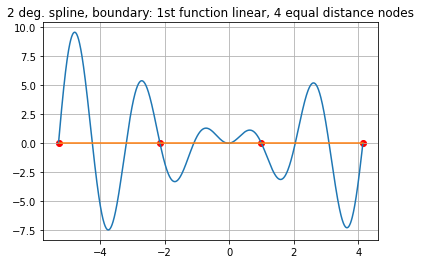

In [49]:
fig, ax = plt.subplots()
line, = ax.plot(xs,func)

def update(n):
    nodes_eq = equal_dist_nodes(a,b,n)
    nodes_func_eq = [f(x) for x in nodes_eq]
    ax.clear()
    ax.plot(xs,func)
    ax.scatter(nodes_eq,nodes_func_eq,color='red')
    ys = quadratic_spline(nodes_eq, nodes_func_eq, xs, "1st_linear")
    line, = ax.plot(xs, ys)
    ax.grid()
    ax.set_title("2 deg. spline, boundary: 1st function linear, {0} equal distance nodes".format(n+1))
    return line,ax

anim = FuncAnimation(fig, update, frames=np.arange(3,30),interval=1500)
HTML(anim.to_html5_video())

## Wykresy

In [50]:
%matplotlib inline
xs = [a+x*(b-a)/999 for x in range(1000)]
func = [f(x) for x in xs]

#### Najlepsze dopasowanie dla funkcji sklejanych stopnia 2

30 węzłow, pierwsza funkcja liniowa

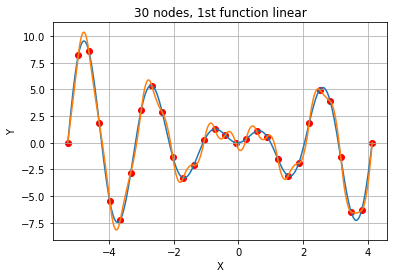

In [51]:
n = 29
eq_nodes = equal_dist_nodes(a,b,n)
eq_nodes_func = [f(node) for node in eq_nodes]
ys = quadratic_spline(eq_nodes, eq_nodes_func, xs, "1st_linear")
text = "30 nodes, 1st function linear"
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,ys)
plt.scatter(eq_nodes,eq_nodes_func,color="red")
plt.grid()
plt.show()

#### Najlepsze dopasowanie dla funkcji sklejanych stopnia 3

30 węzłów, natural cubic spline

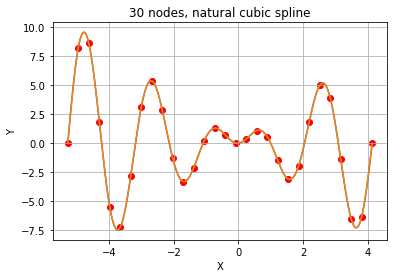

In [52]:
n = 29
eq_nodes = equal_dist_nodes(a,b,n)
eq_nodes_func = [f(node) for node in eq_nodes]
ys = cubic_spline(eq_nodes, eq_nodes_func, xs, "natural")
text = "30 nodes, natural cubic spline"
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,ys)
plt.scatter(eq_nodes,eq_nodes_func,color="red")
plt.grid()
plt.show()

#### Interesujące przypadki

Gdy węzły trafiają w miejsca zerowe funkcji

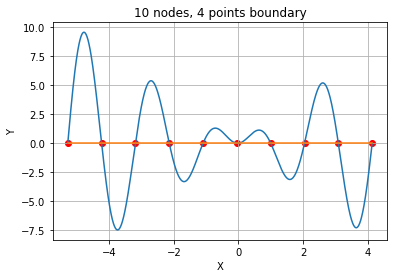

In [53]:
n = 9
eq_nodes = equal_dist_nodes(a,b,n)
eq_nodes_func = [f(node) for node in eq_nodes]
ys = cubic_spline(eq_nodes, eq_nodes_func, xs, "4_points")
text = "10 nodes, 4 points boundary"
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,ys)
plt.scatter(eq_nodes,eq_nodes_func,color="red")
plt.grid()
plt.show()

Dopasowanie natural cubic spline można uznać za akceptowalne przy 22 węzłach, ponieważ już trudno odróżnić spline od zadanej funkcji

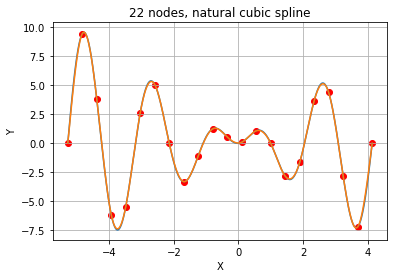

In [54]:
n = 21
eq_nodes = equal_dist_nodes(a,b,n)
eq_nodes_func = [f(node) for node in eq_nodes]
ys = cubic_spline(eq_nodes, eq_nodes_func, xs, "natural")
text = "22 nodes, natural cubic spline"
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,ys)
plt.scatter(eq_nodes,eq_nodes_func,color="red")
plt.grid()
plt.show()

Zmiana okresu oscylacji funkcji interpolującej względem wejściowej

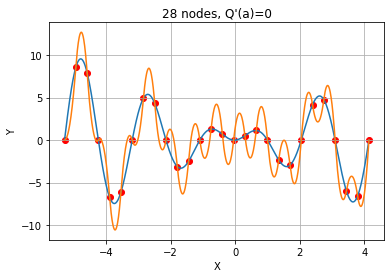

In [55]:
n = 27
eq_nodes = equal_dist_nodes(a,b,n)
eq_nodes_func = [f(node) for node in eq_nodes]
ys = quadratic_spline(eq_nodes, eq_nodes_func, xs, "z0=0")
text = "28 nodes, Q'(a)=0"
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,ys)
plt.scatter(eq_nodes,eq_nodes_func,color="red")
plt.grid()
plt.show()

Warunek brzegowy z pierwszą funkcją liniową przy małej ilości węzłów pozbawia nas możliwości przybliżenia pierwszej oscylacji

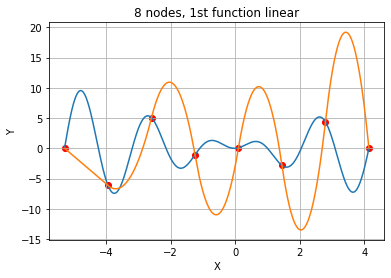

In [56]:
n = 7
eq_nodes = equal_dist_nodes(a,b,n)
eq_nodes_func = [f(node) for node in eq_nodes]
ys = quadratic_spline(eq_nodes, eq_nodes_func, xs, "1st_linear")
text = "8 nodes, 1st function linear"
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,ys)
plt.scatter(eq_nodes,eq_nodes_func,color="red")
plt.grid()
plt.show()

Wraz ze wzrostem liczby węzłów funkcja liniowa występuje na coraz krótszym odcinku (przed pierwszym maksimum lokalnym), przez co nie występuje sytuacja powyżej

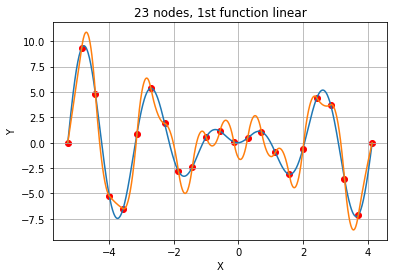

In [57]:
n = 22
eq_nodes = equal_dist_nodes(a,b,n)
eq_nodes_func = [f(node) for node in eq_nodes]
ys = quadratic_spline(eq_nodes, eq_nodes_func, xs, "1st_linear")
text = "23 nodes, 1st function linear"
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,ys)
plt.scatter(eq_nodes,eq_nodes_func,color="red")
plt.grid()
plt.show()

## Dokładność

#### Błąd maksymalny

In [58]:
def chebyshew_dist(xs,f,ys):
    dist = [abs(f[i]-ys[i]) for i in range(len(xs))]
    return max(dist)

#### Błąd średniokwadratowy

In [59]:
def mse(xs,f,ys):
    components = [(f[i]-ys[i])**2 for i in range(len(xs))]
    return sqrt(sum(components))/len(xs)

#### Konfiguracja

In [60]:
xs = [a+x*(b-a)/999 for x in range(1000)]
func = [f(x) for x in xs]

#### Funkcje sklejane st. 3, wielomiany pierwszy i ostatni przez 4 kolejne węzły (warunki brzegowe z wykładu)

In [61]:
print("Węzłów\tOdl. Czebyszewa\tBłąd średniokwadratowy")
for i in range(3,30):
    n = i
    eq_nodes = equal_dist_nodes(a,b,n)
    eq_nodes_func = [f(node) for node in eq_nodes]
    ys = cubic_spline(eq_nodes, eq_nodes_func, xs, "4_points")
    dist = chebyshew_dist(xs,func,ys)
    MSE = mse(xs,func,ys)
    print(n+1,"\t",'%.5f'%dist,"\t",'%.5f'%MSE)

Węzłów	Odl. Czebyszewa	Błąd średniokwadratowy
4 	 9.54241 	 0.12381
5 	 11.30240 	 0.14630
6 	 11.28686 	 0.14955
7 	 15.22656 	 0.18194
8 	 16.78037 	 0.17973
9 	 14.25758 	 0.15760
10 	 9.54241 	 0.12381
11 	 4.99257 	 0.07954
12 	 2.43484 	 0.03150
13 	 1.11799 	 0.01583
14 	 1.61937 	 0.01523
15 	 1.93455 	 0.01604
16 	 1.97087 	 0.01548
17 	 1.86090 	 0.01407
18 	 1.68645 	 0.01233
19 	 1.49289 	 0.01060
20 	 1.30350 	 0.00900
21 	 1.12910 	 0.00760
22 	 0.97388 	 0.00640
23 	 0.83904 	 0.00539
24 	 0.72250 	 0.00454
25 	 0.62226 	 0.00383
26 	 0.53742 	 0.00324
27 	 0.46471 	 0.00275
28 	 0.40299 	 0.00234
29 	 0.35023 	 0.00200
30 	 0.30538 	 0.00172


#### Funkcje sklejane st. 3, drugie pochodne zerują się na końcach (natural cubic spline)

In [62]:
print("Węzłów\tOdl. Czebyszewa\tBłąd średniokwadratowy")
for i in range(3,30):
    n = i
    eq_nodes = equal_dist_nodes(a,b,n)
    eq_nodes_func = [f(node) for node in eq_nodes]
    ys = cubic_spline(eq_nodes, eq_nodes_func, xs, "natural")
    dist = chebyshew_dist(xs,func,ys)
    MSE = mse(xs,func,ys)
    print(n+1,"\t",'%.5f'%dist,"\t",'%.5f'%MSE)

Węzłów	Odl. Czebyszewa	Błąd średniokwadratowy
4 	 9.54241 	 0.12381
5 	 10.83534 	 0.14564
6 	 10.93398 	 0.14742
7 	 13.39858 	 0.16747
8 	 14.05541 	 0.15408
9 	 12.39551 	 0.14031
10 	 9.54241 	 0.12381
11 	 6.71176 	 0.09151
12 	 4.52703 	 0.05144
13 	 3.04712 	 0.03214
14 	 2.09179 	 0.02093
15 	 1.47756 	 0.01414
16 	 1.07615 	 0.00988
17 	 0.80672 	 0.00713
18 	 0.62113 	 0.00530
19 	 0.48981 	 0.00403
20 	 0.39425 	 0.00314
21 	 0.32358 	 0.00250
22 	 0.26985 	 0.00202
23 	 0.22829 	 0.00166
24 	 0.19561 	 0.00138
25 	 0.16948 	 0.00117
26 	 0.14826 	 0.00100
27 	 0.13088 	 0.00086
28 	 0.11652 	 0.00075
29 	 0.10435 	 0.00066
30 	 0.09415 	 0.00058


#### Funkcje sklejane stopnia 2, pierwsza funkcja liniowa

In [63]:
print("Węzłów\tOdl. Czebyszewa\tBłąd średniokwadratowy")
for i in range(3,30):
    n = i
    eq_nodes = equal_dist_nodes(a,b,n)
    eq_nodes_func = [f(node) for node in eq_nodes]
    ys = quadratic_spline(eq_nodes, eq_nodes_func, xs, "1st_linear")
    dist = chebyshew_dist(xs,func,ys)
    MSE = mse(xs,func,ys)
    print(n+1,"\t",'%.5f'%dist,"\t",'%.5f'%MSE)

Węzłów	Odl. Czebyszewa	Błąd średniokwadratowy
4 	 9.54241 	 0.12381
5 	 10.18477 	 0.14870
6 	 10.62847 	 0.15019
7 	 12.03779 	 0.19314
8 	 25.59854 	 0.32294
9 	 11.42952 	 0.17496
10 	 9.54241 	 0.12381
11 	 14.43188 	 0.28331
12 	 24.66257 	 0.41035
13 	 13.58264 	 0.25007
14 	 10.79798 	 0.19283
15 	 7.70000 	 0.14524
16 	 6.24243 	 0.11801
17 	 5.00213 	 0.09531
18 	 4.09773 	 0.07998
19 	 3.38309 	 0.06701
20 	 2.84096 	 0.05749
21 	 2.38683 	 0.04932
22 	 2.08167 	 0.04302
23 	 1.82284 	 0.03755
24 	 1.60590 	 0.03319
25 	 1.42117 	 0.02936
26 	 1.26391 	 0.02622
27 	 1.12906 	 0.02345
28 	 1.01290 	 0.02114
29 	 0.91216 	 0.01907
30 	 0.82463 	 0.01732


#### Funkcje sklejane stopnia 2, na lewym końcu pochodna się zeruje

In [64]:
print("Węzłów\tOdl. Czebyszewa\tBłąd średniokwadratowy")
for i in range(3,30):
    n = i
    eq_nodes = equal_dist_nodes(a,b,n)
    eq_nodes_func = [f(node) for node in eq_nodes]
    ys = quadratic_spline(eq_nodes, eq_nodes_func, xs, "z0=0")
    dist = chebyshew_dist(xs,func,ys)
    MSE = mse(xs,func,ys)
    print(n+1,"\t",'%.5f'%dist,"\t",'%.5f'%MSE)

Węzłów	Odl. Czebyszewa	Błąd średniokwadratowy
4 	 9.54241 	 0.12381
5 	 9.35878 	 0.15425
6 	 11.07613 	 0.15444
7 	 13.71981 	 0.21000
8 	 27.12528 	 0.34788
9 	 12.21482 	 0.18207
10 	 9.54241 	 0.12381
11 	 15.10247 	 0.29853
12 	 25.85902 	 0.43654
13 	 15.17272 	 0.28575
14 	 12.67341 	 0.23543
15 	 9.77581 	 0.19266
16 	 8.45269 	 0.16873
17 	 7.30408 	 0.14815
18 	 6.44977 	 0.13410
19 	 5.75985 	 0.12176
20 	 5.22119 	 0.11241
21 	 4.75577 	 0.10406
22 	 4.43471 	 0.09732
23 	 4.14824 	 0.09123
24 	 3.89841 	 0.08612
25 	 3.67863 	 0.08145
26 	 3.48230 	 0.07741
27 	 3.30680 	 0.07370
28 	 3.14788 	 0.07042
29 	 3.00482 	 0.06738
30 	 2.87581 	 0.06466
